In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [0]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_val.shape

(10000, 28, 28)

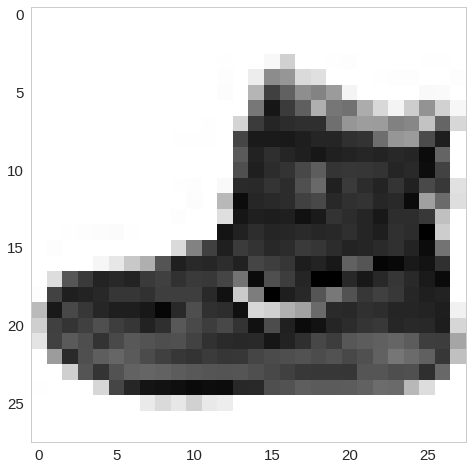

In [0]:
plt.imshow(x_train[0])
plt.grid(False)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

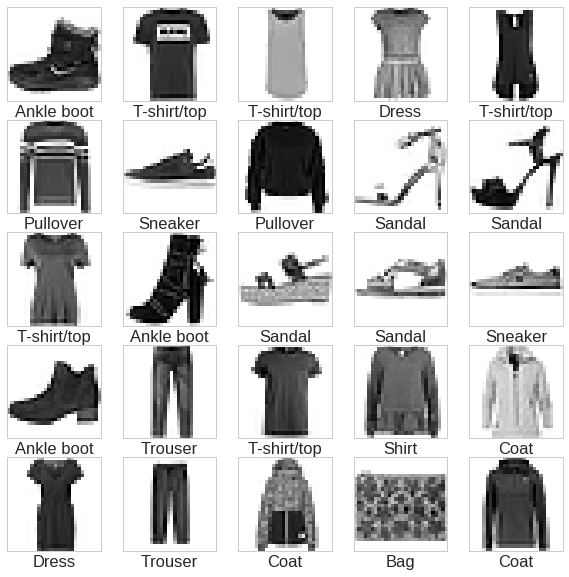

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [0]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [0]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Epoch 1/10
500/500 [==============================] - 9s 19ms/step - loss: 1.7230 - accuracy: 0.7432 - val_loss: 1.6259 - val_accuracy: 0.8398
Epoch 2/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6476 - accuracy: 0.8138 - val_loss: 1.6385 - val_accuracy: 0.8281
Epoch 3/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6196 - accuracy: 0.8416 - val_loss: 1.5974 - val_accuracy: 0.8672
Epoch 4/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6107 - accuracy: 0.8501 - val_loss: 1.5910 - val_accuracy: 0.8672
Epoch 5/10
500/500 [==============================] - 6s 12ms/step - loss: 1.6047 - accuracy: 0.8564 - val_loss: 1.6000 - val_accuracy: 0.8672
Epoch 6/10
500/500 [==============================] - 6s 12ms/step - loss: 1.5962 - accuracy: 0.8645 - val_loss: 1.5840 - val_accuracy: 0.8789
Epoch 7/10
500/500 [==============================] - 6s 12ms/step - loss: 1.5931 - accuracy: 0.8681 - val_loss: 1.5864 - val_accuracy: 0.8789

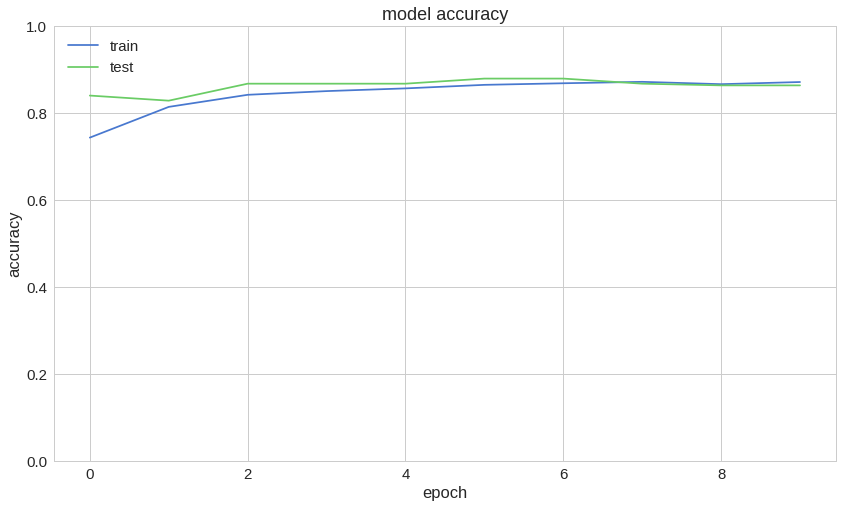

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='upper left');

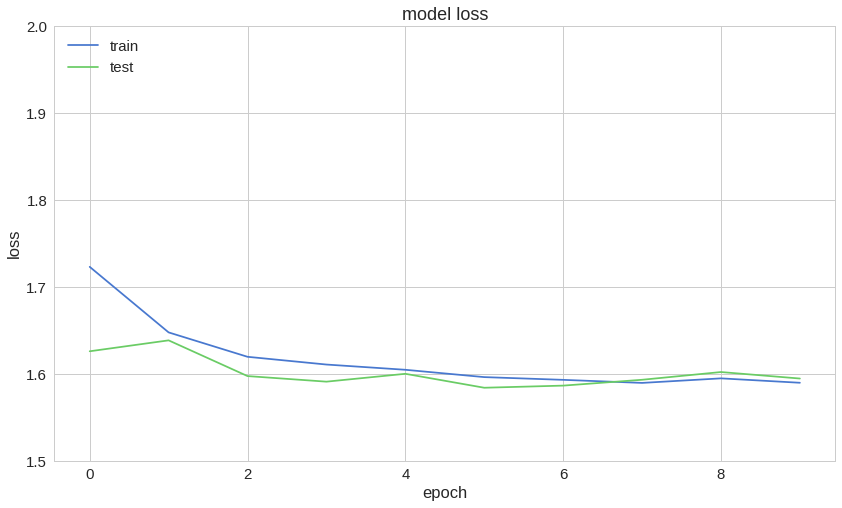

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((1.5, 2))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(val_dataset)


In [0]:
predictions[0]

array([1.5946301e-20, 1.0000000e+00, 2.3995005e-20, 1.0416983e-21,
       1.3260497e-21, 1.3986856e-23, 1.7906514e-32, 6.1092206e-30,
       1.9693501e-23, 1.2127347e-24], dtype=float32)

In [0]:
np.argmax(predictions[0])

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

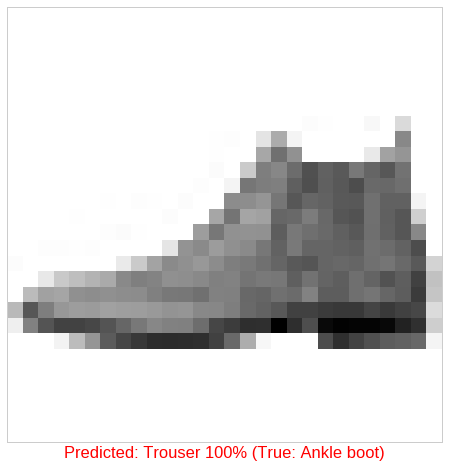

In [0]:
i = 0
plot_image(i, predictions, y_val, x_val)